# Generative Adversarial Nets

## The Structure of GAN

The GAN consist by two parts, Generator and Discriminator.

### Generator Network

The goal of the Generator is to produce data samples that are as close as possible to the real data distribution. The input to the Generator is a random noise vector z, and the Generator network G outputs a fake data sample G(z).


#### Generate nosie by normal distribution

In [13]:
import numpy as np
def generate_noise_vector(batch_size, noise_dim):
    return np.random.normal(0, 1, size=(batch_size, noise_dim))

In [18]:
# gen 20 sample with 5 dimension
fake_sample = generate_noise_vector(20,5)

In [17]:
fake_sample[0]

array([ 0.71325104,  0.1747777 , -0.15049079, -0.731691  , -0.2106078 ])

#### Create a dense generator

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Define the generator model
def make_generator_model():
    model = tf.keras.Sequential()
    # First layer: Dense layer that transforms the input noise vector into a 128-dimensional vector
    model.add(layers.Dense(128, activation='relu', input_shape=(100,)))
    
    # Second layer: Dense layer that transforms the vector into a 256-dimensional vector
    model.add(layers.Dense(256, activation='relu'))
    
    # Third layer: Dense layer that transforms the vector into a 512-dimensional vector
    model.add(layers.Dense(512, activation='relu'))
    
    # Output layer: Dense layer that transforms the vector into the target data shape, here assuming 2D points
    model.add(layers.Dense(2, activation='tanh'))  # Assuming the goal is to generate 2D points
    return model

# Create an instance of the generator model
generator = make_generator_model()

In [25]:
generator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               12928     
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 512)               131584    
                                                                 
 dense_8 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 178562 (697.51 KB)
Trainable params: 178562 (697.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Generate a noise vector
noise_vector = generate_noise_vector(batch_size=1, noise_dim=100)

# Generate a sample using the generator
generated_sample = generator(noise_vector)

# Print the generated sample
print(generated_sample)

tf.Tensor([[-0.25463113 -0.17118685]], shape=(1, 2), dtype=float32)


### Discriminator

The goal of the Discriminator is to distinguish between real data samples and fake data samples generated by the Generator. The Discriminator D takes a data sample x as input and outputs a scalar representing the probability that the sample is from the real data D(x).

In [30]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the discriminator model
def make_discriminator_model():
    model = tf.keras.Sequential()
    # First layer: Dense layer that transforms the input vector into a 512-dimensional vector
    model.add(layers.Dense(512, activation='relu', input_shape=(2,)))
    # Second layer: Dense layer that transforms the vector into a 256-dimensional vector
    model.add(layers.Dense(256, activation='relu'))
    # Third layer: Dense layer that transforms the vector into a 128-dimensional vector
    model.add(layers.Dense(128, activation='relu'))
    # Output layer: Dense layer that outputs a single value, representing the probability that the input is real
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Create an instance of the discriminator model
discriminator = make_discriminator_model()



tf.Tensor([[0.49434778]], shape=(1, 1), dtype=float32)


In [32]:
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               1536      
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 165889 (648.00 KB)
Trainable params: 165889 (648.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Example input to the discriminator: a batch of 2D points
example_input = tf.random.normal([1, 2])

# Use the discriminator to classify the example input
decision = discriminator(generated_sample)

In [37]:
# Print the discriminator's decision
print(decision)

tf.Tensor([[0.4998153]], shape=(1, 1), dtype=float32)


### Loss function for discriminator

$min_Gmax_D V(D,G) = E_{x~p_{data}(x)}[logD(X)] + E_{z~p_{z}(z)}[log(1-D(G(z)))]$

- z is a random vector, typically sampled from a standard normal distribution or a uniform distribution.
- $p_z(z)$ represents the noise distribution input to the Generator.
- $G(z)$ represents the fake data sample generated by the Generator.
- $p_{data}$ represents the real data distribution. 
- D(x) represents the probability estimated by the Discriminator that the data sample x is real.
- $E_{x}p_{data}(x)[logD(X)]$ represents the expectation of the logarithm of the discriminator's output D(x)
over the real data distribution $p_{data}$.

- $E_{z}p_{z}(z)[log(1-D(G(z)))]$ represents the expectation of the logarithm of one minus the discriminator's output D(G(Z)) over the noise distribution, where G(z) is the data generated by the generator.
over the noise distribution $P_{Z}$, where G(z) is the data generated by the generator.

- G and D play the two-player minimax game with value function V(G, D).
- The discriminator's task is to differentiate between real data and generated data. It expects to output 1 for real data (meaning real) and 0 for generated data (meaning fake).
- The task of the generator is to generate data that can fool the discriminator into thinking that the data is real. The generator's loss function wants the discriminator's output on the generated data to be close to 1 (indicating truth).


/var/folders/4l/s0_5bfp95ybfwcnzh06g6h080000gn/T/ipykernel_26419/1905652581.py:8: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


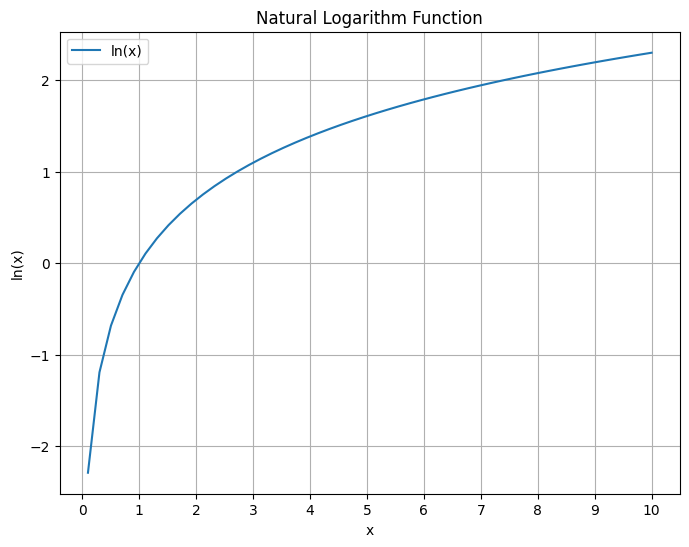

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x values
x = np.linspace(-10, 10, 100)

# Define the log function
y = np.log(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='ln(x)')
plt.title('Natural Logarithm Function')
plt.xlabel('x')
plt.ylabel('ln(x)')
plt.xticks(np.arange(0, 11, 1))  # Set x-ticks from -10 to 10 with step 1
plt.legend()
plt.grid(True)
plt.show()


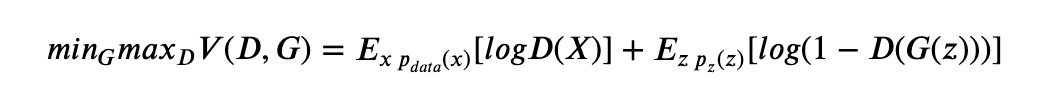

### Train a GAN

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define the generator model
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(100,)))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(2, activation='tanh'))  # Assuming the goal is to generate 2D points
    return model

# Define the discriminator model
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(512, activation='relu', input_shape=(2,)))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Create instances of the generator and discriminator models
generator = make_generator_model()
discriminator = make_discriminator_model()

# Define the loss function
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Define the discriminator loss
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

# Define the generator loss
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Define the optimizers
generator_optimizer = Adam(1e-4)
discriminator_optimizer = Adam(1e-4)

# Generate a random noise vector
def generate_noise_vector(batch_size, noise_dim):
    return np.random.normal(0, 1, size=(batch_size, noise_dim))

# Define the training step
@tf.function
def train_step(real_data):
    noise_dim = 100
    batch_size = real_data.shape[0]
    
    noise = generate_noise_vector(batch_size, noise_dim)
    noise = tf.convert_to_tensor(noise, dtype=tf.float32)
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_data = generator(noise, training=True)
        
        real_output = discriminator(real_data, training=True)
        fake_output = discriminator(generated_data, training=True)
        
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
        total_loss = gen_loss + disc_loss
    
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return gen_loss, disc_loss, total_loss

# Define the training loop with loss recording
def train(dataset, epochs):
    gen_losses = []
    disc_losses = []
    total_losses = []
    for epoch in range(epochs):
        for real_data in dataset:
            gen_loss, disc_loss, total_loss = train_step(real_data)
        gen_losses.append(gen_loss.numpy())
        disc_losses.append(disc_loss.numpy())
        total_losses.append(total_loss.numpy())
        print(f'Epoch {epoch+1}, Generator Loss: {gen_loss.numpy()}, Discriminator Loss: {disc_loss.numpy()}, Total Loss: {total_loss.numpy()}')
    return gen_losses, disc_losses, total_losses

# Create synthetic data for training (e.g., 2D points from a Gaussian distribution)
def generate_real_data(num_samples):
    return np.random.normal(0, 1, size=(num_samples, 2))

# Prepare the dataset
num_samples = 1000
batch_size = 32
real_data = generate_real_data(num_samples)
dataset = tf.data.Dataset.from_tensor_slices(real_data).shuffle(num_samples).batch(batch_size)

In [31]:
# Train the GAN
epochs = 50
gen_losses, disc_losses, total_losses = train(dataset, epochs)

Epoch 1, Generator Loss: 0.20837637782096863, Discriminator Loss: 2.0731682777404785, Total Loss: 2.2815446853637695
Epoch 2, Generator Loss: 0.6716129779815674, Discriminator Loss: 1.1998438835144043, Total Loss: 1.8714568614959717
Epoch 3, Generator Loss: 1.1567614078521729, Discriminator Loss: 0.8595463037490845, Total Loss: 2.016307830810547
Epoch 4, Generator Loss: 0.35746872425079346, Discriminator Loss: 1.932595133781433, Total Loss: 2.2900638580322266
Epoch 5, Generator Loss: 1.1915397644042969, Discriminator Loss: 0.8810682892799377, Total Loss: 2.07260799407959
Epoch 6, Generator Loss: 1.4483009576797485, Discriminator Loss: 0.5950487852096558, Total Loss: 2.0433497428894043
Epoch 7, Generator Loss: 0.3535288870334625, Discriminator Loss: 1.6865286827087402, Total Loss: 2.04005765914917
Epoch 8, Generator Loss: 1.296381950378418, Discriminator Loss: 1.0458815097808838, Total Loss: 2.3422634601593018
Epoch 9, Generator Loss: 0.5985113382339478, Discriminator Loss: 1.5357794761

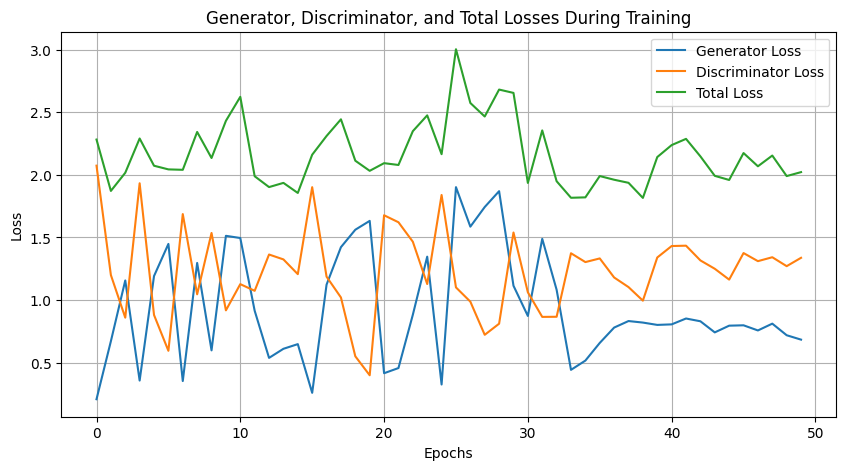

In [32]:
# Plot the losses
plt.figure(figsize=(10, 5))
plt.plot(gen_losses, label='Generator Loss')
plt.plot(disc_losses, label='Discriminator Loss')
plt.plot(total_losses, label='Total Loss')
plt.title('Generator, Discriminator, and Total Losses During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# After about 45 epochs the toal loss get stable, which means the model converge.

32/32 [==============================] - 0s 663us/step


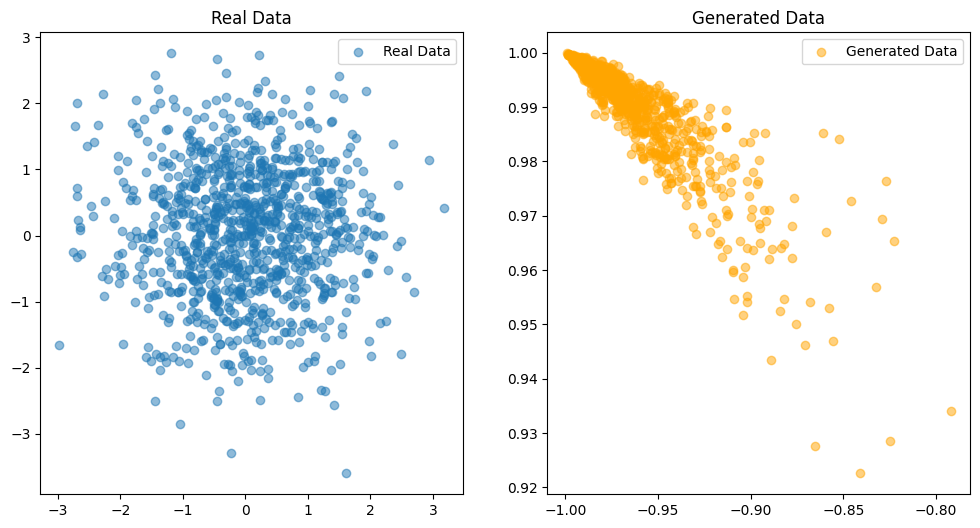

In [24]:
import matplotlib.pyplot as plt

# Generate synthetic data
noise_dim = 100
num_samples = 1000
noise = generate_noise_vector(num_samples, noise_dim)
generated_data = generator.predict(noise)

# Real data for comparison
real_data = generate_real_data(num_samples)

# Plot real vs generated data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(real_data[:, 0], real_data[:, 1], alpha=0.5, label='Real Data')
plt.title('Real Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(generated_data[:, 0], generated_data[:, 1], alpha=0.5, label='Generated Data', color='orange')
plt.title('Generated Data')
plt.legend()

plt.show()


## Compare

### GAN

GANs require differentiation through the visible units, and thus cannot model discrete data.

### VAES

VAEs require differentiation through the hidden units, and thus cannot have discrete latent variables.

### NCE

The key limitation of NCE is that its “discriminator”is defined by the ratio of the probability densities of the noise distribution and the model distribution $\frac{p_{model}(x)}{p_{model(x)} + p_{noise}(x)}$, and thus requires the ability to evaluate and backpropagate through both densities.

### DCGAN

- GANs have been known to be unstable to train, often resulting in generators that produce nonsensical outputs.
- DCGAN improves the stability of the model and the quality of generated images by introducing convolutional layers, batch normalization, removing pooling layers, and improved activation functions (relu to leaky relu). These improvements make DCGAN more effective and practical than traditional GAN ​​when processing image generation tasks.




## Data set

- MNIST
- Toronto Face Databace
- CIFAR-10

## Traing time

For MINIST, the Tensorflow guide run 60 epochs and the running time for each epochs is about 98s.